# Training Data
This notebook takes the large data set, and creates a subset that will be faster to train models with.
The original data set is over 3 GB.  

I'll create a train/test data set that has 100k reviews.  There will be 75k training rows, and 25k test rows.

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1]:
# Read JSON file in chunks
chunk_size = 100000  # Adjust the chunk size as needed
chunks = []
with open('Kindle_Store.json', 'r') as file:
    for chunk in pd.read_json(file, chunksize=chunk_size, lines=True):
        chunks.append(chunk)

# Concatenate all chunks to form a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [15]:
kindle_only_df = df[df['style'] == {'Format:': ' Kindle Edition'}]

In [16]:
kindle_only_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5045160 entries, 9 to 5722987
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 466.7+ MB


In [26]:
df_1 = kindle_only_df[kindle_only_df['overall'] == 1].sample(20_000)
df_2 = kindle_only_df[kindle_only_df['overall'] == 2].sample(20_000)
df_3 = kindle_only_df[kindle_only_df['overall'] == 3].sample(20_000)
df_4 = kindle_only_df[kindle_only_df['overall'] == 4].sample(20_000)
df_5 = kindle_only_df[kindle_only_df['overall'] == 5].sample(20_000)
sample_df = pd.concat([df_1, df_2, df_3, df_4, df_5])

/Users/andy/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andy/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='overall', ylabel='Count'>

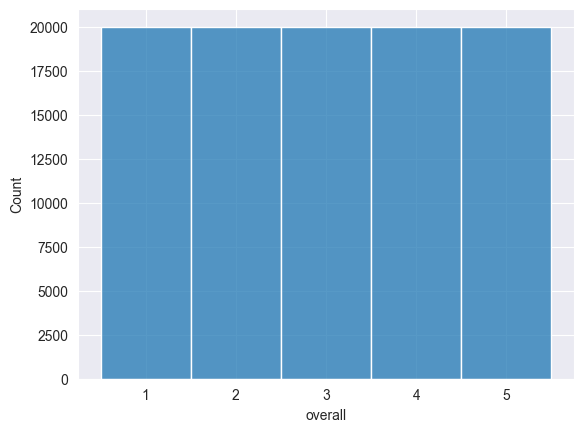

In [27]:
sns.histplot(data=sample_df, x='overall', discrete=True)

In [28]:
# remove commas from vote column
sample_df['vote'] = sample_df['vote'].str.replace(',', '')
# cast vote column to int, converting Nan to 0
sample_df['vote'] = sample_df['vote'].fillna(0)
sample_df['vote'] = sample_df['vote'].astype('int')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4539579 to 2292238
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         100000 non-null  int64 
 1   verified        100000 non-null  bool  
 2   reviewTime      100000 non-null  object
 3   reviewerID      100000 non-null  object
 4   asin            100000 non-null  object
 5   style           100000 non-null  object
 6   reviewerName    99993 non-null   object
 7   reviewText      99977 non-null   object
 8   summary         99961 non-null   object
 9   unixReviewTime  100000 non-null  int64 
 10  vote            100000 non-null  int64 
 11  image           63 non-null      object
dtypes: bool(1), int64(3), object(8)
memory usage: 9.3+ MB


In [29]:
train_sample_df, test_sample_df = train_test_split(sample_df, test_size=0.25, random_state=42)
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, 2325253 to 4180637
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         75000 non-null  int64 
 1   verified        75000 non-null  bool  
 2   reviewTime      75000 non-null  object
 3   reviewerID      75000 non-null  object
 4   asin            75000 non-null  object
 5   style           75000 non-null  object
 6   reviewerName    74997 non-null  object
 7   reviewText      74981 non-null  object
 8   summary         74971 non-null  object
 9   unixReviewTime  75000 non-null  int64 
 10  vote            75000 non-null  int64 
 11  image           51 non-null     object
dtypes: bool(1), int64(3), object(8)
memory usage: 6.9+ MB


In [30]:
sample_df.to_feather("100k_kindle_reviews.feather")
train_sample_df.to_feather("75k_train_kindle_reviews.feather")
test_sample_df.to_feather("25k_test_kindle_reviews.feather")

In [31]:
loaded_test_sample_df = pd.read_feather("25k_test_kindle_reviews.feather")
loaded_test_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 1099125 to 1055573
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         25000 non-null  int64 
 1   verified        25000 non-null  bool  
 2   reviewTime      25000 non-null  object
 3   reviewerID      25000 non-null  object
 4   asin            25000 non-null  object
 5   style           25000 non-null  object
 6   reviewerName    24996 non-null  object
 7   reviewText      24996 non-null  object
 8   summary         24990 non-null  object
 9   unixReviewTime  25000 non-null  int64 
 10  vote            25000 non-null  int64 
 11  image           12 non-null     object
dtypes: bool(1), int64(3), object(8)
memory usage: 2.3+ MB
